In [7]:
# firstly import some of the most frequently used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import linear_rainbow

In [8]:
data = pd.read_csv("C:/Users/SATISH/OneDrive/Desktop/tips (data for regression problem).csv")        # Load the dataset


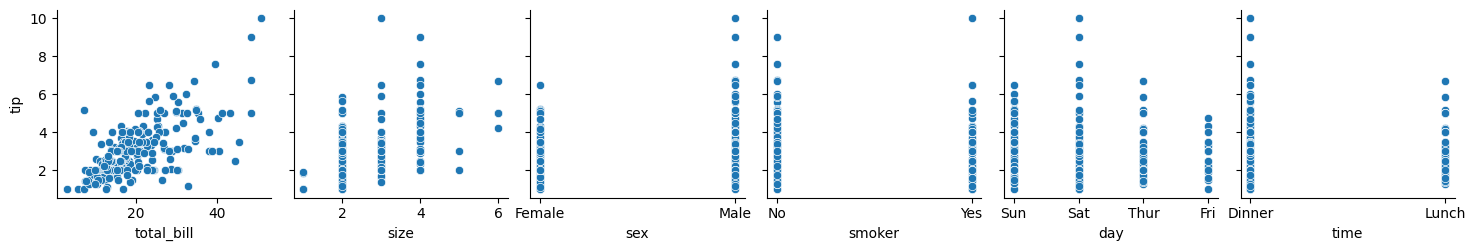

In [9]:
# do some data exploration
sns.pairplot(data, x_vars=['total_bill', 'size', 'sex', 'smoker', 'day', 'time'], y_vars='tip')
plt.show()                # visualising data by Scatter plot for 'tip' vs other features
                        # we can see that top has a positive correlation with total bill

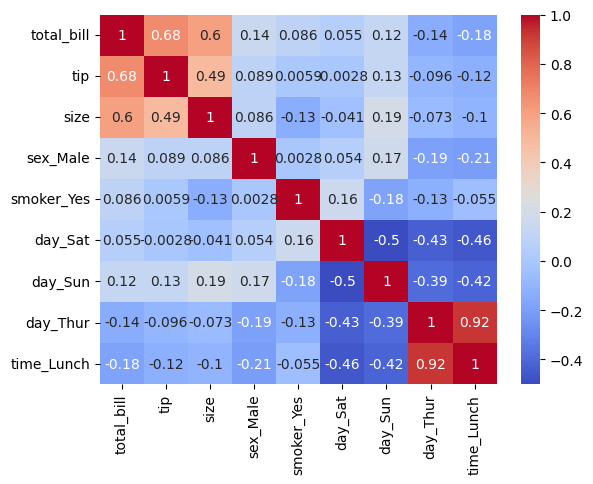

In [11]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)    # to convert categorical variables into numeric


corr = data_encoded.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()                       # ploting heatmap for given dataset
                           # from the heatmap we can see that tip has strong relation with total bill and size

In [12]:
import statsmodels.api as sm
X = data[['total_bill', 'size']]
y = data['tip']
X = sm.add_constant(X)
rainbow_stat, rainbow_p_val = linear_rainbow(sm.OLS(y, X).fit())         # Rainbow test for linear trend
print(f"Rainbow test p-value: {rainbow_p_val}")                     # the p-value is greater than 0.05 so linear regression model is adequate

Rainbow test p-value: 0.17048935693447306


In [13]:
# now we have to Train-test split
X = data[['total_bill', 'size']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Apply Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, y_pred))
        # we conclude that about 48.11% of the variability in the tip is explained by the model, which is a moderate fit

Linear Regression R2: 0.481108409798949


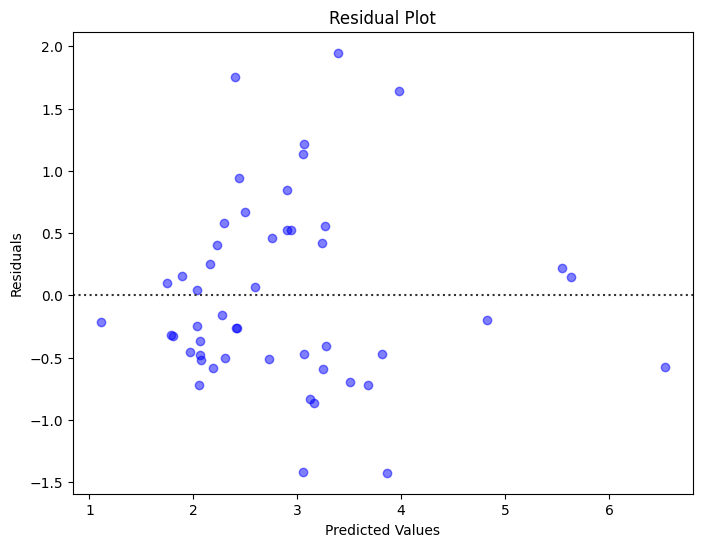

In [27]:
residuals = y_test - y_pred                         # to compute residuals


plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, scatter_kws={'alpha': 0.5, 'color': 'blue'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()              # Ploting residuals 


In [15]:
# to apply Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("Ridge Regression R2:", r2_score(y_test, y_pred_ridge))
          # approx 48.19% of the variance in tip is explained by total_bill and size and is a moderate fit

Ridge Regression R2: 0.4818828773627837


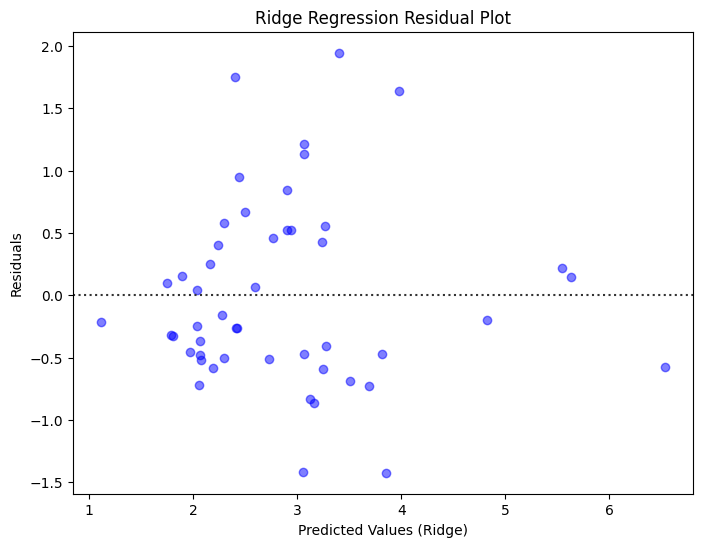

In [26]:
residuals_ridge = y_test - y_pred_ridge                         # to compute residuals


plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_ridge, y=residuals_ridge, scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
              line_kws={'color': 'red'})  # Optional: red line to see trends
plt.title('Ridge Regression Residual Plot')
plt.xlabel('Predicted Values (Ridge)')
plt.ylabel('Residuals')
plt.show()                           # ploting residuals

In [16]:
# to apply lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("Lasso Regression R2:", r2_score(y_test, y_pred_lasso))
              # lasso regression with R2 = 0.5273 is performing moderately well

Lasso Regression R2: 0.5273068720881755


In [17]:
# to apply Decision Tree Regression
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree R2:", r2_score(y_test, y_pred_tree))


Decision Tree R2: 0.33222247239859226


In [18]:
# to apply Random Forest Regression
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_forest))
              # we conclude that random forest regression is underperforming compared to other models

Random Forest R2: 0.3326175906132479


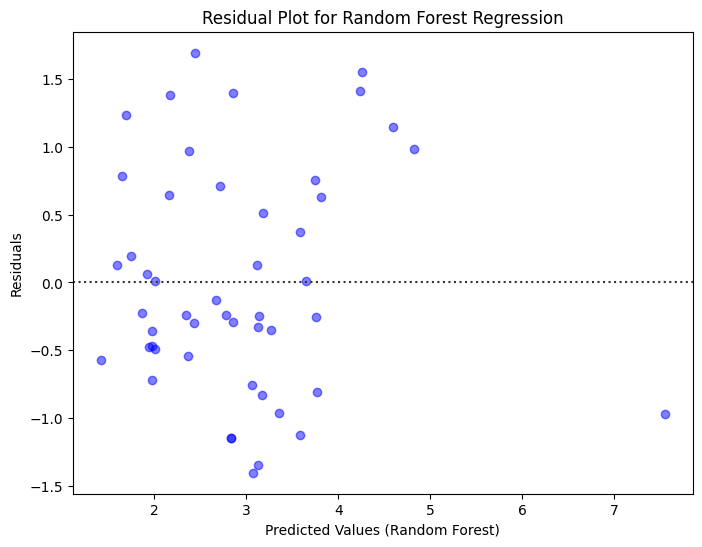

In [35]:
residuals_forest = y_test - y_pred_forest                # to compute residuals


plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_forest, y=residuals_forest, 
              scatter_kws={'alpha': 0.5, 'color': 'blue'}, 
              line_kws={'color': 'red'})
plt.title('Residual Plot for Random Forest Regression')
plt.xlabel('Predicted Values (Random Forest)')
plt.ylabel('Residuals')
plt.show()                     #  Ploting residuals

In [19]:
# to apply Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
print("SVR R2:", r2_score(y_test, y_pred_svr))


SVR R2: 0.5721968127152731


In [20]:
# to apply K-Nearest Neighbors Regression
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNN R2:", r2_score(y_test, y_pred_knn))


KNN R2: 0.4050596025324963


In [ ]:
# Finally, we conclude that tips moderately depends on total bill and size And accuracy of the model